# Social Network Segmentation Analysis

In this exercise, we will try to identify different groups of teenagers based on their personal preferences using an unsupervised learning model.  
  
Start by importing your libraries, loading the dataset and exploring its variables.  
What features do you find? Do they have the correct datatypes?

In [1]:
#Import your libraries here

import pandas as pd


In [2]:
#Load the dataset and explore its variables

data = pd.read_csv('./data/snsdata.csv')
print(data.shape)
data.head(3)


(30000, 40)


gradyear gender     age  friends  basketball  football  soccer  softball  \
0      2006      M  18.982        7           0         0       0         0   
1      2006      F  18.801        0           0         1       0         0   
2      2006      M  18.335       69           0         1       0         0   

   volleyball  swimming  ...  blonde  mall  shopping  clothes  hollister  \
0           0         0  ...       0     0         0        0          0   
1           0         0  ...       0     1         0        0          0   
2           0         0  ...       0     0         0        0          0   

   abercrombie  die  death  drunk  drugs  
0            0    0      0      0      0  
1            0    0      0      0      0  
2            0    0      1      0      0  

[3 rows x 40 columns]

## 1. Data Wrangling

If you found in the last step that there are variables that need to be dealt with before we can start our analysis, please do it. Comment your code and take us through the steps of your thinking.  

Consider the some of these aspects:  
* Wrong data types
* Null values
* Consistency in categorical data

In [3]:
#Your code here:
data.isnull().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [4]:
data.dropna(inplace=True)

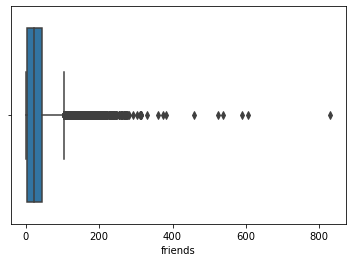

In [5]:
import seaborn as sns
data.columns
sns.boxplot(data.friends)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24005 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      24005 non-null  int64  
 1   gender        24005 non-null  object 
 2   age           24005 non-null  float64
 3   friends       24005 non-null  int64  
 4   basketball    24005 non-null  int64  
 5   football      24005 non-null  int64  
 6   soccer        24005 non-null  int64  
 7   softball      24005 non-null  int64  
 8   volleyball    24005 non-null  int64  
 9   swimming      24005 non-null  int64  
 10  cheerleading  24005 non-null  int64  
 11  baseball      24005 non-null  int64  
 12  tennis        24005 non-null  int64  
 13  sports        24005 non-null  int64  
 14  cute          24005 non-null  int64  
 15  sex           24005 non-null  int64  
 16  sexy          24005 non-null  int64  
 17  hot           24005 non-null  int64  
 18  kissed        24005 non-nu

## 2. Data Visualization

Now that the data is more or less fixed, plot some charts to understand better how it is composed:  
* Check distribution of variables - do we have outliers? What should we do with them?
* Understand which features are correlated - do they represent the same? Which ones should we keep?
* When we compare two variables, is it possible to see groups in the data?
* Given the dimension of the dataset, would it be useful to perform dimension reduction in some variables? Which ones would you group?

Comment your ideas based on the visualizations you made and other data exploration. What will be your next steps before modeling?

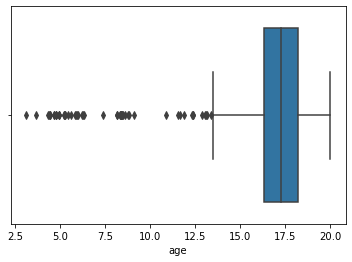

In [7]:
#Your code here:

data_2= data[data.age <= 20]
sns.boxplot(data_2.age)

In [8]:
data_2.corr()['age'][:]

gradyear       -0.841555
age             1.000000
friends        -0.049616
basketball     -0.051828
football       -0.004242
soccer         -0.051414
softball       -0.035359
volleyball     -0.054949
swimming       -0.029386
cheerleading   -0.037538
baseball       -0.014487
tennis         -0.000480
sports         -0.033246
cute           -0.024813
sex             0.009188
sexy           -0.036129
hot            -0.051661
kissed         -0.011993
dance          -0.047635
band           -0.001095
marching        0.015496
music          -0.002107
rock           -0.043076
god             0.016304
church         -0.016358
jesus          -0.001783
bible           0.010523
hair           -0.059524
dress           0.038372
blonde         -0.004969
mall           -0.063409
shopping       -0.032409
clothes        -0.037828
hollister      -0.040048
abercrombie    -0.045219
die            -0.017008
death           0.005592
drunk           0.023060
drugs          -0.011291
Name: age, dtype: float64

## 3. Feature Engineering

Based on your previous conclusions, perform transformations in your features. Think about:  
* Category Encoding
* Outliers & Standardization
* Dimension Reduction
* Discard features that are less relevant to group the data

Why did you choose each method? Please explain your rationale.

In [9]:
#Your code here:

genero=pd.get_dummies(data_2.gender,drop_first=True)
data_3=pd.concat([data_2,genero],axis=1).copy()

data_3 = data_3.drop(['gender'], axis=1)
print(data_3.columns)


Index(['gradyear', 'age', 'friends', 'basketball', 'football', 'soccer',
       'softball', 'volleyball', 'swimming', 'cheerleading', 'baseball',
       'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed', 'dance',
       'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus', 'bible',
       'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes', 'hollister',
       'abercrombie', 'die', 'death', 'drunk', 'drugs', 'M'],
      dtype='object')


## 4. Modeling

Now that your data is ready, apply one (or more) unsupervised learning model to find the groups of teens that exist:
* What model did you choose?
* What is the optimal number of clusters?
* Once your clusters are defined, how do you interpret them? - What type of teens there are? What are the differences between them?

In [10]:
#Your code here:

from sklearn.cluster import KMeans
import numpy as np
kmeans=KMeans()

kmeans.fit(data_3)

KMeans()

In [11]:
y_pred = kmeans.predict(data_3)

data_3['cluster']=kmeans.labels_

In [12]:
data_3.cluster.value_counts()


2    8596
0    5841
6    4635
3    2792
1    1233
5     435
4     114
7       6
Name: cluster, dtype: int64